## 1. Descripción del caso

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 100)

datos = pd.read_csv("/content/drive/MyDrive/Futura/HRAnalytics.csv", sep=",", decimal=".")

In [3]:
# Lectura de datos
#datos = pd.read_csv("HRAnalytics.csv", sep=",", decimal=".")

# Inspeccionando la estructura de los datos
info_data = {
    'Columnas': datos.columns,
    'Tipo de Dato': datos.dtypes,
    'Valores Nulos': datos.isnull().sum(),
    'Valores No Nulos': datos.notnull().sum()
}

# Creando el DataFrame
estructura_datos = pd.DataFrame(info_data)

# Aplicando estilo para la visualización
estructura_datos.style.set_caption("Estructura de Datos del Archivo 'HRAnalytics.csv'") \
                      .set_properties(**{'text-align': 'center'}) \
                      .set_table_styles([{
                          'selector': 'th',
                          'props': [('font-size', '14px'), ('text-align', 'center'), ('color', 'white'),
                                    ('background-color', '#4CAF50')]
                      }, {
                          'selector': 'td',
                          'props': [('font-size', '12px')]
                      }])

,Columnas,Tipo de Dato,Valores Nulos,Valores No Nulos
employee_id,employee_id,int64,0,54808
department,department,object,0,54808
region,region,object,0,54808
education,education,object,2409,52399
gender,gender,object,0,54808
recruitment_channel,recruitment_channel,object,0,54808
no_of_trainings,no_of_trainings,int64,0,54808
age,age,int64,0,54808
previous_year_rating,previous_year_rating,float64,4124,50684
length_of_service,length_of_service,int64,0,54808


In [4]:
# Vista general de los primeros 10 elementos
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', 10)       # Muestra hasta 10 filas
print("\nPrimeros 10 elementos de los datos:")
datos.head(10)


Primeros 10 elementos de los datos:


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [5]:
# Detectando los valores duplicados con ayuda de en la columna 'employee_id'
unique_ids = datos['employee_id'].nunique()
print(f'Número de IDs únicos: {unique_ids}')

Número de IDs únicos: 54808


In [6]:
# Eliminamos la variable 'employee_id' ya que no es de interés
datos.drop('employee_id', axis=1, inplace=True)

In [7]:
# Convertimos la variable target a tipo categoría
datos['is_promoted'] = datos['is_promoted'].astype('category')

In [8]:
# Revisamos el orden de las observaciones negativas y positivas
print(datos['is_promoted'].cat.categories)

Index([0, 1], dtype='int64')


In [9]:
# Renombramos las categorías del target
datos['is_promoted'] = datos['is_promoted'].cat.rename_categories(['NO_PROMOVIDO', 'PROMOVIDO'])

In [10]:
# Evaluando la variable target 'is_promoted'

# Calculando las frecuencias y porcentajes
conteo = datos['is_promoted'].value_counts()
porcentaje = datos['is_promoted'].value_counts(normalize=True) * 100

# Creando un DataFrame para mostrar ambos resultados en un cuadro
resultado = pd.DataFrame({'Frecuencia': conteo, 'Porcentaje (%)': porcentaje})

# Aplicando formato para la visualización
resultado.style.format({'Porcentaje (%)': '{:.2f}%'}) \
               .set_caption("Distribución de la Variable Target 'is_promoted'") \
               .set_properties(**{'text-align': 'center'}) \
               .set_table_styles([{
                   'selector': 'th',
                   'props': [('font-size', '14px'), ('text-align', 'center'), ('color', 'white'),
                             ('background-color', '#4CAF50')]
               }, {
                   'selector': 'td',
                   'props': [('font-size', '12px')]
               }])

,Frecuencia,Porcentaje (%)
is_promoted,,
NO_PROMOVIDO,50140,91.48%
PROMOVIDO,4668,8.52%


- El porcentaje de nuestra variable target nos indica que debemos hacer un balanceo previo ya que supera el 9:1 con 91.48% para los no promovidos y un 8.52% para los promovidos. Tambien podemos ver que nuestro éxito será encontrar los "PROMOVIDO"

## 2. Detección de datos perdidos o valores faltantes

<Axes: >

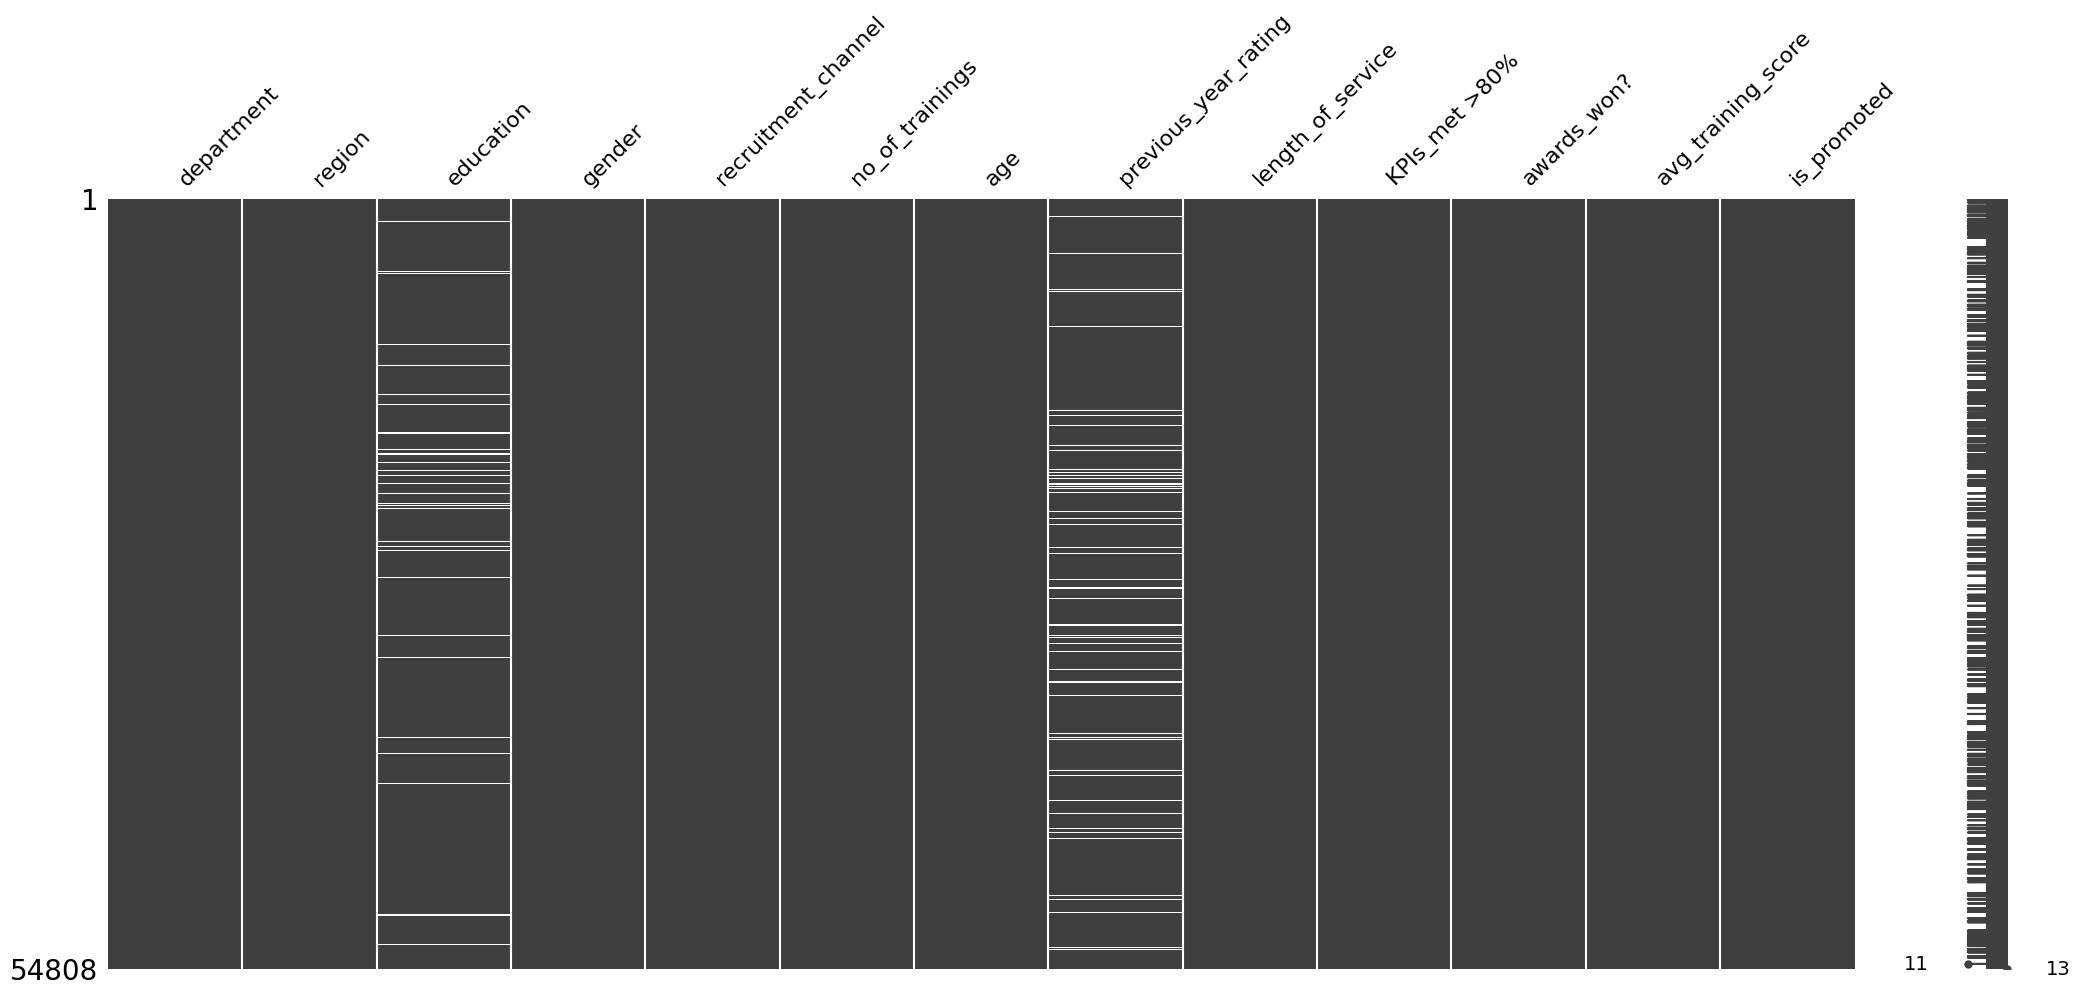

In [11]:
import missingno as msno

# Visualización de datos perdidos
msno.matrix(datos)

In [12]:
# Número de registros con datos perdidos por variable
pd.set_option('display.max_rows', None) # Muestra todas las columnas
pd.set_option('display.max_rows', None) # Muestra todas las filas
datos.isnull().sum()

,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0
KPIs_met >80%,0


## 3. Preprocesamiento de datos

### Analizando la naturaleza de las variables "previous_year_rating" y "education" antes de ser imputadas

In [13]:
# Conteo de valores en la columna 'education'
education_counts = datos['education'].value_counts(dropna=False)

# Creando un DataFrame
education_df = pd.DataFrame({'Frecuencia': education_counts})

# Aplicando estilo para la visualización
education_df.style.set_caption("Distribución de la Variable 'education'") \
                  .set_properties(**{'text-align': 'center'}) \
                  .set_table_styles([{
                      'selector': 'th',
                      'props': [('font-size', '14px'), ('text-align', 'center'), ('color', 'white'),
                                ('background-color', '#4CAF50')]
                  }, {
                      'selector': 'td',
                      'props': [('font-size', '12px')]
                  }])

,Frecuencia
education,
Bachelor's,36669
Master's & above,14925
nan,2409
Below Secondary,805


- Viendo la naturaleza de la variable no podemos hacer uso de alguna imputación ya que el NaN es por falta de educación no por un valor sin completar, entonces el NaN la consideraremos como otro categoría.

In [14]:
# Conteo de valores en la columna 'previous_year_rating'
rating_counts = datos['previous_year_rating'].value_counts(dropna=False)

# Creando un DataFrame
rating_df = pd.DataFrame({'Frecuencia': rating_counts})

# Aplicando estilo para la visualización
rating_df.style.set_caption("Distribución de la Variable 'previous_year_rating'") \
               .set_properties(**{'text-align': 'center'}) \
               .set_table_styles([{
                   'selector': 'th',
                   'props': [('font-size', '14px'), ('text-align', 'center'), ('color', 'white'),
                             ('background-color', '#4CAF50')]
               }, {
                   'selector': 'td',
                   'props': [('font-size', '12px')]
               }])

,Frecuencia
previous_year_rating,
3.000000,18618
5.000000,11741
4.000000,9877
1.000000,6223
2.000000,4225
nan,4124


- Al analizar esta variable notamos que esos NaN provienen de colaboradores que tienen solo un año trabajando en la empresa, lo que los excluye de tener un rating, no podemos hacer una imputación numérica, pero lo que si podemos hacer es crear una nueva categoría.

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64


<Axes: >

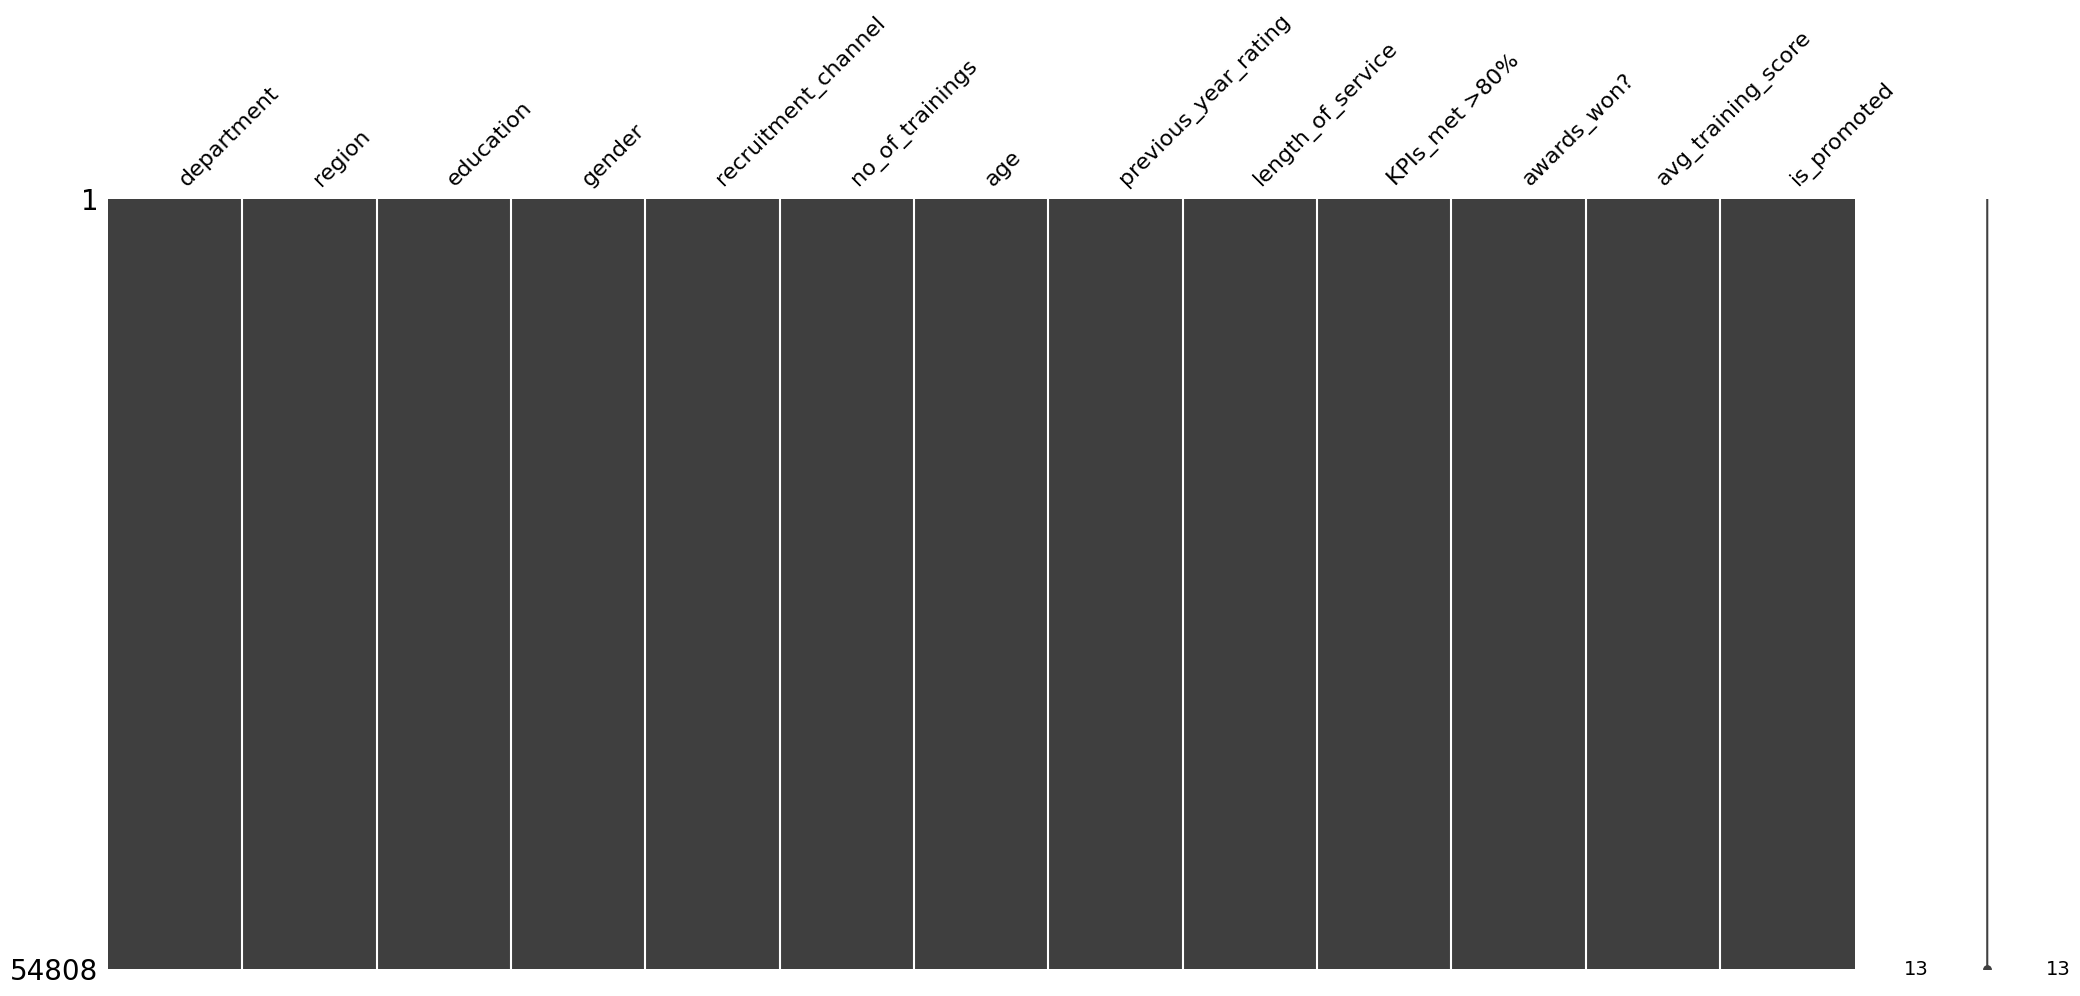

In [15]:
# Creamos una copia del data set donde tendremos la base de datos imputada
datos_transformado = datos.copy()

# Reemplazamos los "NaN" de la variable education por la categoría "Sin_información"
datos_transformado['education'] = datos_transformado['education'].fillna('Sin_información')

# Reemplazamos los "NaN" de la variable previous_year_rating por la categoría "0"
datos_transformado['previous_year_rating']  = datos_transformado['previous_year_rating'].fillna('0')

print(datos_transformado.isnull().sum())

msno.matrix(datos_transformado)

In [16]:
# Vista general de los primeros 4 elementos
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', 4)       # Muestra hasta 4 filas
print("\nPrimeros 4 elementos de los datos:")
datos_transformado.head(4)


Primeros 4 elementos de los datos:


,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,NO_PROMOVIDO
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,NO_PROMOVIDO
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,NO_PROMOVIDO
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,NO_PROMOVIDO


### Identificando variables con varianza cero o casi cero

In [17]:
from sklearn.feature_selection import VarianceThreshold

# Inicializamos el selector para identificar variables con varianza baja
selector = VarianceThreshold(threshold=0.01)
selector.fit(datos_transformado.select_dtypes(include=[np.number]))

# Identificamos las columnas que se eliminarán
low_variance_features = [column for column, keep in zip(datos_transformado.select_dtypes(include=[np.number]).columns, selector.get_support()) if not keep]
print("Variables con baja varianza:", low_variance_features)

# Eliminamos las columnas de baja varianza identificadas
datos_transformado.drop(columns=low_variance_features, inplace=True)

Variables con baja varianza: []


- No se identifico ninguna variable con baja varianza como para eliminarse, asi que continuamos.

### Normalización de las variables numéricas.

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionamos las columnas numéricas para normalizarlas
numerical_columns = ['no_of_trainings','age','previous_year_rating','length_of_service', 'KPIs_met >80%',
                     'awards_won?','avg_training_score']

# Inicializamos el escalador Min-Max
scaler = MinMaxScaler()

# Aplicamos la normalización
datos_transformado[numerical_columns] = scaler.fit_transform(datos_transformado[numerical_columns])

# Verificamos el resumen de las variables normalizadas
datos_transformado[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,54808.0,0.028112,0.067696,0.0,0.000,0.000,0.000000,1.0
age,54808.0,0.370098,0.191504,0.0,0.225,0.325,0.475000,1.0
...,...,...,...,...,...,...,...,...
awards_won?,54808.0,0.023172,0.150450,0.0,0.000,0.000,0.000000,1.0
avg_training_score,54808.0,0.406446,0.222859,0.0,0.200,0.350,0.616667,1.0


- Para normalizar variables usualmente se seleccionan variables numéricas continuas, pero en este caso normalizaremos todas para mejorar la interpretación.

In [19]:
datos_transformado_catboost = datos_transformado.copy()

### Creando variables dummies

In [20]:
# Como análizamos esta variable además de tener muchas categorías no tenia impacto en el target, es decir no lo discrimina. Por lo tanto
# no la usaré para dummizar.
datos_transformado['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [21]:
# Creación de variables dummies para las variables categóricas seleccionadas
datos_transformado = pd.get_dummies(datos_transformado.drop(columns={'region'}), columns=['department', 'education',
                                                                 'gender', 'recruitment_channel'],
                                    drop_first=True)

# Verificamos la estructura después de crear las dummies
datos_transformado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   no_of_trainings               54808 non-null  float64 
 1   age                           54808 non-null  float64 
 2   previous_year_rating          54808 non-null  float64 
 3   length_of_service             54808 non-null  float64 
 4   KPIs_met >80%                 54808 non-null  float64 
 5   awards_won?                   54808 non-null  float64 
 6   avg_training_score            54808 non-null  float64 
 7   is_promoted                   54808 non-null  category
 8   department_Finance            54808 non-null  bool    
 9   department_HR                 54808 non-null  bool    
 10  department_Legal              54808 non-null  bool    
 11  department_Operations         54808 non-null  bool    
 12  department_Procurement        54808 non-null  

In [22]:
# Vista general de los primeros 4 elementos
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', 4)       # Muestra hasta 4 filas
print("\nPrimeros 4 elementos de los datos:")
datos_transformado.head(4)


Primeros 4 elementos de los datos:


,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,education_Sin_información,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0.000000,0.375,1.0,0.194444,1.0,0.0,0.166667,NO_PROMOVIDO,False,False,False,False,False,False,True,False,False,True,False,False,False,True
1,0.000000,0.250,1.0,0.083333,0.0,0.0,0.350000,NO_PROMOVIDO,False,False,False,True,False,False,False,False,False,False,False,True,False,False
2,0.000000,0.350,0.6,0.166667,0.0,0.0,0.183333,NO_PROMOVIDO,False,False,False,False,False,False,True,False,False,False,False,True,False,True
3,0.111111,0.475,0.2,0.250000,0.0,0.0,0.183333,NO_PROMOVIDO,False,False,False,False,False,False,True,False,False,False,False,True,False,False


### Identificando predictores correlacionados

In [23]:
import pandas as pd
import numpy as np

# Calculamos la matriz de correlación para las columnas de interés
descr_cor = datos_transformado.iloc[:, :7].corr()

# Extraemos la parte superior de la matriz de correlación (similar a 'upper.tri' en R)
upper_tri = descr_cor.where(np.triu(np.ones(descr_cor.shape), k=1).astype(bool))

# Resumen de los valores de correlación
correlation_values = upper_tri.stack()
print("Resumen de los valores de correlación:")
print(correlation_values.describe())

Resumen de los valores de correlación:
count    21.000000
mean      0.056061
           ...    
75%       0.078391
max       0.657111
Length: 8, dtype: float64


In [24]:
# Encontrando las columnas con alta correlación (similar a 'findCorrelation' en R)
threshold = 0.40
high_corr = [column for column in upper_tri.columns if any(upper_tri[column].abs() > threshold)]

# Mostramos las variables con alta correlación
print("\nVariables con alta correlación:")
print(high_corr)


Variables con alta correlación:
['length_of_service']


- Al encontrarse que la varible 'length_of_service' tiene alta correlación, entonces debera ser eliminada.

In [25]:
# Eliminamos la columna 'length_of_service' ya que se encuentra en la lista de alta correlación
if 'length_of_service' in high_corr:
    datos_transformado.drop(columns='length_of_service', inplace=True)
    print("\nColumna 'length_of_service' eliminada.")
else:
    print("\nColumna 'length_of_service' no está altamente correlacionada y no fue eliminada.")

# Verificamos la estructura del DataFrame después de la eliminación
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', 4)       # Muestra hasta 4 filas
print("\nPrimeros 4 elementos de los datos:")
datos_transformado.head(4)


Columna 'length_of_service' eliminada.

Primeros 4 elementos de los datos:


,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,education_Sin_información,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0.000000,0.375,1.0,1.0,0.0,0.166667,NO_PROMOVIDO,False,False,False,False,False,False,True,False,False,True,False,False,False,True
1,0.000000,0.250,1.0,0.0,0.0,0.350000,NO_PROMOVIDO,False,False,False,True,False,False,False,False,False,False,False,True,False,False
2,0.000000,0.350,0.6,0.0,0.0,0.183333,NO_PROMOVIDO,False,False,False,False,False,False,True,False,False,False,False,True,False,True
3,0.111111,0.475,0.2,0.0,0.0,0.183333,NO_PROMOVIDO,False,False,False,False,False,False,True,False,False,False,False,True,False,False


# 1. *SIN DUMMIES*

## Selección de muestra de entrenamiento (80%) y de evaluación (20%)

In [26]:
var_cat = datos_transformado_catboost.describe(include='object').columns
for i in list(var_cat):
  datos_transformado_catboost[i] = datos_transformado_catboost[i].astype('category')

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Selección de muestra de entrenamiento (80%) y de evaluación (20%)
# Configuramos la semilla para la reproducibilidad
np.random.seed(2024)

# Dividimos el dataset en entrenamiento (80%) y evaluación (20%)
X_catboost = datos_transformado_catboost.drop(columns='is_promoted')
y_catboost = datos_transformado_catboost['is_promoted']
X_train_catboost, X_test_catboost, y_train_catboost, y_test_catboost = train_test_split(X_catboost, y_catboost, test_size=0.2, stratify=y_catboost, random_state=2024)

# Calculando las frecuencias y porcentajes de las clases en el dataset original
original_counts = y_catboost.value_counts()
original_percent = round(y_catboost.value_counts(normalize=True) * 100, 2)

# Calculando las frecuencias y porcentajes de las clases en el conjunto de entrenamiento
train_counts = y_train_catboost.value_counts()
train_percent = round(y_train_catboost.value_counts(normalize=True) * 100, 2)

# Calculando las frecuencias y porcentajes de las clases en el conjunto de prueba
test_counts = y_test_catboost.value_counts()
test_percent = round(y_test_catboost.value_counts(normalize=True) * 100, 2)

# Creando DataFrames para cada conjunto
original_df = pd.DataFrame({'Frecuencia': original_counts, 'Porcentaje (%)': original_percent})
train_df = pd.DataFrame({'Frecuencia': train_counts, 'Porcentaje (%)': train_percent})
test_df = pd.DataFrame({'Frecuencia': test_counts, 'Porcentaje (%)': test_percent})

# Aplicando estilo visual a cada cuadro
def estilizar_tabla(df, titulo):
    return (df.style.set_caption(titulo)
                 .format({'Porcentaje (%)': '{:.2f}%'})
                 .set_properties(**{'text-align': 'center'})
                 .set_table_styles([{
                     'selector': 'th',
                     'props': [('font-size', '14px'), ('text-align', 'center'), ('color', 'white'),
                               ('background-color', '#4CAF50')]
                 }, {
                     'selector': 'td',
                     'props': [('font-size', '12px')]
                 }]))

In [28]:
estilizar_tabla(original_df, "Distribución de Clases en el Dataset Original")

,Frecuencia,Porcentaje (%)
is_promoted,,
NO_PROMOVIDO,50140,91.48%
PROMOVIDO,4668,8.52%


In [29]:
estilizar_tabla(train_df, "Distribución de Clases en el Conjunto de Entrenamiento")

,Frecuencia,Porcentaje (%)
is_promoted,,
NO_PROMOVIDO,40112,91.48%
PROMOVIDO,3734,8.52%


In [30]:
estilizar_tabla(test_df, "Distribución de Clases en el Conjunto de Prueba")

,Frecuencia,Porcentaje (%)
is_promoted,,
NO_PROMOVIDO,10028,91.48%
PROMOVIDO,934,8.52%


## 5. Modelado

### 5.3. Modelo con Catboost sin smote

In [31]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


In [32]:
# Lista de características categóricas
categorical_features = [x for x in list(var_cat)  if x != 'region']

In [33]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Lista de características categóricas
categorical_features = list(var_cat)

# Inicializar el modelo con algunos hiperparámetros
model = CatBoostClassifier(iterations=1000,
                           learning_rate=0.1,
                           depth=6,
                           cat_features=categorical_features,
                           verbose=100)

# Entrenar el modelo
model.fit(X_train_catboost , y_train_catboost )

0:	learn: 0.5733181	total: 180ms	remaining: 2m 59s
100:	learn: 0.1631897	total: 14.1s	remaining: 2m 5s
200:	learn: 0.1542184	total: 27.8s	remaining: 1m 50s
300:	learn: 0.1484814	total: 39.9s	remaining: 1m 32s
400:	learn: 0.1435009	total: 47.7s	remaining: 1m 11s
500:	learn: 0.1395318	total: 53.3s	remaining: 53.1s
600:	learn: 0.1360006	total: 1m 1s	remaining: 40.5s
700:	learn: 0.1326296	total: 1m 6s	remaining: 28.4s
800:	learn: 0.1298958	total: 1m 14s	remaining: 18.4s
900:	learn: 0.1267545	total: 1m 20s	remaining: 8.83s
999:	learn: 0.1236643	total: 1m 26s	remaining: 0us


In [34]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score

# Predecir en el conjunto de train
y_pred_train_catboost  = model.predict(X_train_catboost)

cm_catboost_train = confusion_matrix(y_train_catboost, y_pred_train_catboost)

# Cálculo de métricas
sensitivity_catboost_train = recall_score(y_train_catboost, y_pred_train_catboost, pos_label='PROMOVIDO')
specificity_catboost_train = cm_catboost_train[0, 0] / sum(cm_catboost_train[0, :])
accuracy_catboost_train = accuracy_score(y_train_catboost, y_pred_train_catboost)
balanced_accuracy_catboost_train = (sensitivity_catboost_train + specificity_catboost_train) / 2

# Mostrar resultados
print("\nResultados con catboost:")
print("Matriz de Confusión:\n", cm_catboost_train)
print(f"Sensibilidad: {sensitivity_catboost_train:.4f}")
print(f"Especificidad: {specificity_catboost_train:.4f}")
print(f"Accuracy: {accuracy_catboost_train:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_catboost_train:.4f}")


Resultados con catboost:
Matriz de Confusión:
 [[40085    27]
 [ 2293  1441]]
Sensibilidad: 0.3859
Especificidad: 0.9993
Accuracy: 0.9471
Balanced Accuracy: 0.6926


### 5.3. Modelo con Catboost-Grid sin smote

In [59]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Definir el modelo base
model_catboost_grid = CatBoostClassifier(iterations=1000,
                           cat_features=categorical_features,
                           verbose=100)

# Definir los hiperparámetros para la búsqueda en cuadrícula
param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

In [60]:
# Configurar el GridSearchCV para optimizar el Recall
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

recall_scorer = make_scorer(recall_score, pos_label='PROMOVIDO')

grid_search_catboost = GridSearchCV(estimator=model_catboost_grid,
                           param_grid=param_grid,
                           scoring=recall_scorer,
                           cv=5,  # Puedes ajustar el número de folds
                           verbose=2,
                           n_jobs=2)
grid_search_catboost.fit(X_train_catboost, y_train_catboost)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score

# Predecir en el conjunto de train
y_pred_train_catboost  = grid_search_catboost.predict(X_train_catboost)

cm_catboost_train = confusion_matrix(y_train_catboost, y_pred_train_catboost)


# Cálculo de métricas
sensitivity_catboost_train = recall_score(y_train_catboost, y_pred_train_catboost, pos_label='PROMOVIDO')
specificity_catboost_train = cm_catboost_train[0, 0] / sum(cm_catboost_train[0, :])
accuracy_catboost_train = accuracy_score(y_train_catboost, y_pred_train_catboost)
balanced_accuracy_catboost_train = (sensitivity_catboost_train + specificity_catboost_train) / 2

# Mostrar resultados
print("\nResultados con catboost:")
print("Matriz de Confusión:\n", cm_catboost_train)
print(f"Sensibilidad: {sensitivity_catboost_train:.4f}")
print(f"Especificidad: {specificity_catboost_train:.4f}")
print(f"Accuracy: {accuracy_catboost_train:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_catboost_train:.4f}")

## 6. Predicción de los modelos en la data testing

### 6.1. Predicción del Modelo con Catboost sin smote en la data testing

In [ ]:
print("\nResultados del Modelo con Catboost sin smote en la data testing:")
y_pred_test_catboost = model.predict_proba(X_test_catboost)[:, 1]
y_pred_proba_test_catboost = model.predict(X_test_catboost)


# Cálculo de métricas
cm_catboost_test = confusion_matrix(y_test_catboost, y_pred_test_catboost)
sensitivity_catboost_test = recall_score(y_test_catboost, y_pred_test_catboost, pos_label='PROMOVIDO')
specificity_catboost_test = cm_catboost_test[0, 0] / sum(cm_catboost_test[0, :])
accuracy_catboost_test = accuracy_score(y_test_catboost, y_pred_test_catboost)
balanced_accuracy_catboost_test = (sensitivity_catboost_test + specificity_catboost_test) / 2
logloss_catboost_test = log_loss(y_test_catboost, y_pred_proba_test_catboost)

# Cálculo de la curva ROC y AUC
fpr_catboost_test, tpr_catboost_test, _ = roc_curve(y_test_catboost, y_pred_proba_test_catboost, pos_label='PROMOVIDO')
roc_auc_catboost_test = auc(fpr_catboost_test, tpr_catboost_test)

# Gráfico de la curva ROC para el Modelo con Regresión Logística
plt.figure(figsize=(8, 6))
plt.plot(fpr_catboost_test, tpr_catboost_test, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_catboost_test))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Modelo con Catboost sin smote')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
# Mostrar métricas
print("\nResultados con catboost:")
print("Matriz de Confusión:\n", cm_catboost_test)
print(f"Sensibilidad: {sensitivity_catboost_test:.4f}")
print(f"Especificidad: {specificity_catboost_test:.4f}")
print(f"Accuracy: {accuracy_catboost_test:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_catboost_test:.4f}")
print(f"Log-Loss (test): {logloss_catboost_test:.4f}")
print(f"AUC (test): {roc_auc_catboost_test:.4f}")

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, log_loss, confusion_matrix, recall_score, accuracy_score

In [ ]:
# Ejecutar la búsqueda
grid_search_catboost.fit(X_train_border_catboost, y_train_border_catboost)

# Ver los mejores parámetros encontrados
print("Mejores hiperparámetros:", grid_search_catboost.best_params_)
print("Mejor Recall (validación cruzada):", grid_search_catboost.best_score_)

In [ ]:
X_train_border_catboost.isnull().sum()

In [ ]:
dummie = X_train_border_catboost.columns[6:]
for i in list(dummie):
  X_train_border_catboost[i] = X_train_border_catboost[i].astype(int)


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score

# Predecir en el conjunto de train
y_pred_train_catboost_grid  = grid_search_catboost.predict(X_train_catboost)

cm_catboost_train_grid = confusion_matrix(y_pred_train_catboost_grid, y_pred_train_catboost)

# Cálculo de métricas
sensitivity_catboost_train_grid = recall_score(y_pred_train_catboost_grid, y_pred_train_catboost, pos_label='PROMOVIDO')
specificity_catboost_train_grid = cm_catboost_train_grid[0, 0] / sum(cm_catboost_train_grid[0, :])
accuracy_catboost_train_grid = accuracy_score(y_pred_train_catboost_grid, y_pred_train_catboost)
balanced_accuracy_catboost_train_grid = (sensitivity_catboost_train_grid + specificity_catboost_train_grid) / 2

# Mostrar resultados
print("\nResultados con catboost:")
print("Matriz de Confusión:\n", cm_catboost_train)
print(f"Sensibilidad: {sensitivity_catboost_train:.4f}")
print(f"Especificidad: {specificity_catboost_train:.4f}")
print(f"Accuracy: {accuracy_catboost_train:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_catboost_train:.4f}")

### 6.2. Predicción del Modelo con Catboost-Grid sin smote en la data testing

In [ ]:
print("\nResultados del Modelo con Catboost sin smote en la data testing:")
y_pred_test_catboost_grid = grid_search_catboost.predict_proba(X_test_catboost)[:, 1]
y_pred_proba_test_catboost_grid = grid_search_catboost.predict(X_test_catboost)


# Cálculo de métricas
cm_catboost_test_grid = confusion_matrix(y_test_catboost_grid, y_pred_test_catboost_grid)
sensitivity_catboost_test_grid = recall_score(y_test_catboost_grid, y_pred_test_catboost_grid, pos_label='PROMOVIDO')
specificity_catboost_test_grid = cm_catboost_test_grid[0, 0] / sum(cm_catboost_test_grid[0, :])
accuracy_catboost_test_grid = accuracy_score(y_test_catboost_grid, y_pred_test_catboost_grid)
balanced_accuracy_catboost_test_grid = (sensitivity_catboost_test_grid + specificity_catboost_test_grid) / 2
logloss_catboost_test_grid = log_loss(y_test_catboost_grid, y_pred_proba_test_catboost_grid)

# Cálculo de la curva ROC y AUC
fpr_catboost_test_grid, tpr_catboost_test_grid, _ = roc_curve(y_test_catboost_grid, y_pred_proba_test_catboost_grid, pos_label='PROMOVIDO')
roc_auc_catboost_test_grid = auc(fpr_catboost_test_grid, tpr_catboost_test_grid)

# Gráfico de la curva ROC para el Modelo con Regresión Logística
plt.figure(figsize=(8, 6))
plt.plot(fpr_catboost_test_grid, tpr_catboost_test_grid, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_catboost_test_grid))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Modelo con Catboost sin smote')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
# Mostrar métricas
print("\nResultados con catboost:")
print("Matriz de Confusión:\n", cm_catboost_test_grid)
print(f"Sensibilidad: {sensitivity_catboost_test_grid:.4f}")
print(f"Especificidad: {specificity_catboost_test_grid:.4f}")
print(f"Accuracy: {accuracy_catboost_test_grid:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_catboost_test_grid:.4f}")
print(f"Log-Loss (test): {logloss_catboost_test_grid:.4f}")
print(f"AUC (test): {roc_auc_catboost_test_grid:.4f}")

# *CON DUMIES*

## Selección de muestra de entrenamiento (80%) y de evaluación (20%)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Selección de muestra de entrenamiento (80%) y de evaluación (20%)
# Configuramos la semilla para la reproducibilidad
np.random.seed(2024)

# Dividimos el dataset en entrenamiento (80%) y evaluación (20%)
X = datos_transformado.drop(columns='is_promoted')
y = datos_transformado['is_promoted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2024)

# Calculando las frecuencias y porcentajes de las clases en el dataset original
original_counts = y.value_counts()
original_percent = round(y.value_counts(normalize=True) * 100, 2)

# Calculando las frecuencias y porcentajes de las clases en el conjunto de entrenamiento
train_counts = y_train.value_counts()
train_percent = round(y_train.value_counts(normalize=True) * 100, 2)

# Calculando las frecuencias y porcentajes de las clases en el conjunto de prueba
test_counts = y_test.value_counts()
test_percent = round(y_test.value_counts(normalize=True) * 100, 2)

# Creando DataFrames para cada conjunto
original_df = pd.DataFrame({'Frecuencia': original_counts, 'Porcentaje (%)': original_percent})
train_df = pd.DataFrame({'Frecuencia': train_counts, 'Porcentaje (%)': train_percent})
test_df = pd.DataFrame({'Frecuencia': test_counts, 'Porcentaje (%)': test_percent})

# Aplicando estilo visual a cada cuadro
def estilizar_tabla(df, titulo):
    return (df.style.set_caption(titulo)
                 .format({'Porcentaje (%)': '{:.2f}%'})
                 .set_properties(**{'text-align': 'center'})
                 .set_table_styles([{
                     'selector': 'th',
                     'props': [('font-size', '14px'), ('text-align', 'center'), ('color', 'white'),
                               ('background-color', '#4CAF50')]
                 }, {
                     'selector': 'td',
                     'props': [('font-size', '12px')]
                 }]))

In [ ]:
estilizar_tabla(original_df, "Distribución de Clases en el Dataset Original")

In [ ]:
estilizar_tabla(train_df, "Distribución de Clases en el Conjunto de Entrenamiento")

In [ ]:
estilizar_tabla(test_df, "Distribución de Clases en el Conjunto de Prueba")

- En este caso tenemos un porcentaje igual para el entrenamiento y prueba entonces podemos continuar sin problemas.

## 4. Balanceo

### Balanceo con Borderline-SMOTE

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

# Configuración de Borderline-SMOTE
borderline_smote_catboost = BorderlineSMOTE(sampling_strategy=0.45, random_state=2024, kind='borderline-1')

# Aplicar Borderline-SMOTE al conjunto de datos de entrenamiento
X_train_border_catboost, y_train_border_catboost = borderline_smote_catboost.fit_resample(X_train, y_train)

# Calculando las frecuencias y porcentajes de las clases después de aplicar Borderline-SMOTE
border_counts = y_train_border_catboost.value_counts()
border_percent = round(y_train_border_catboost.value_counts(normalize=True) * 100, 2)

# Creando un DataFrame para la distribución de clases después de Borderline-SMOTE
borderline_df = pd.DataFrame({'Frecuencia': border_counts, 'Porcentaje (%)': border_percent})

# Aplicando estilo visual al cuadro
def estilizar_tabla(df, titulo):
    return (df.style.set_caption(titulo)
                 .format({'Porcentaje (%)': '{:.2f}%'})
                 .set_properties(**{'text-align': 'center'})
                 .set_table_styles([{
                     'selector': 'th',
                     'props': [('font-size', '14px'), ('text-align', 'center'), ('color', 'white'),
                               ('background-color', '#4CAF50')]
                 }, {
                     'selector': 'td',
                     'props': [('font-size', '12px')]
                 }]))

# Mostrar el cuadro estilizado
estilizar_tabla(borderline_df, "Distribución de Clases después de aplicar Borderline-SMOTE")

## 5. Modelado

### 5.3. Modelo con Catboost con smote

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Inicializar el modelo con algunos hiperparámetros
model_catboost_border = CatBoostClassifier(iterations=1000,
                           learning_rate=0.1,
                           depth=6,
                           verbose=100)

# Entrenar el modelo
model_catboost_border.fit(X_train_border_catboost , y_train_border_catboost )

In [ ]:
# Predecir en el conjunto de train
y_pred_train_border_catboost  = model_catboost_border.predict(X_train_border_catboost)

cm_border_catboost_train = confusion_matrix(y_train_border_catboost, y_pred_train_border_catboost)

# Cálculo de métricas
sensitivity_border_catboost_train = recall_score(y_train_border_catboost, y_pred_train_border_catboost, pos_label='PROMOVIDO')
specificity_border_catboost_train = cm_border_catboost_train[0, 0] / sum(cm_border_catboost_train[0, :])
accuracy_border_catboost_train = accuracy_score(y_train_border_catboost, y_pred_train_border_catboost)
balanced_accuracy_border_catboost_train = (sensitivity_border_catboost_train + specificity_border_catboost_train) / 2

# Mostrar resultados
print("\nResultados con catboost:")
print("Matriz de Confusión:\n", cm_border_catboost_train)
print(f"Sensibilidad: {sensitivity_border_catboost_train:.4f}")
print(f"Especificidad: {specificity_border_catboost_train:.4f}")
print(f"Accuracy: {accuracy_border_catboost_train:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_border_catboost_train:.4f}")

In [ ]:
# Predecir en el conjunto de train
y_pred_test_border_catboost = model_catboost_border.predict(X_test)

cm_border_catboost_test = confusion_matrix(y_test, y_pred_test_border_catboost)

# Cálculo de métricas
sensitivity_border_catboost_test = recall_score(y_test, y_pred_test_border_catboost, pos_label='PROMOVIDO')
specificity_border_catboost_test = cm_border_catboost_test[0, 0] / sum(cm_border_catboost_test[0, :])
accuracy_border_catboost_test = accuracy_score(y_test, y_pred_test_border_catboost)
balanced_accuracy_border_catboost_test = (sensitivity_border_catboost_test + specificity_border_catboost_test) / 2

# Mostrar resultados
print("\nResultados con catboost:")
print("Matriz de Confusión:\n", cm_border_catboost_test)
print(f"Sensibilidad: {sensitivity_border_catboost_test:.4f}")
print(f"Especificidad: {specificity_border_catboost_test:.4f}")
print(f"Accuracy: {accuracy_border_catboost_test:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_border_catboost_test:.4f}")

### 5.6. Modelo con Catboost gritseach

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Definir el modelo base
model_catboost = CatBoostClassifier(verbose=0)

# Definir los hiperparámetros para la búsqueda en cuadrícula
param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

In [ ]:
# Configurar el GridSearchCV para optimizar el Recall
grid_search_catboost = GridSearchCV(estimator=model_catboost,
                           param_grid=param_grid,
                           scoring='recall',
                           cv=5,  # Puedes ajustar el número de folds
                           verbose=2,
                           n_jobs=-1)

In [ ]:
X_train_border_catboost.head()

## 6. Predicción de los modelos en la data testing

### 6.3. Predicción del Modelo Naive Bayes en la data testing

In [ ]:
print("\nResultados del Modelo con Naive Bayes en la data testing:")
y_prob_nb_test = nb_border.predict_proba(X_test)[:, 1]
y_pred_nb_test = nb_border.predict(X_test)

# Cálculo de métricas
cm_nb_test = confusion_matrix(y_test, y_pred_nb_test)
sensitivity_nb_test = recall_score(y_test, y_pred_nb_test, pos_label='PROMOVIDO')
specificity_nb_test = cm_nb_test[0, 0] / sum(cm_nb_test[0, :])
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
balanced_accuracy_nb_test = (sensitivity_nb_test + specificity_nb_test) / 2
logloss_nb_test = log_loss(y_test, y_prob_nb_test)

# Cálculo de la curva ROC y AUC
fpr_nb_test, tpr_nb_test, _ = roc_curve(y_test, y_prob_nb_test, pos_label='PROMOVIDO')
roc_auc_nb_test = auc(fpr_nb_test, tpr_nb_test)

# Gráfico de la curva ROC para el Modelo Naive Bayes
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb_test, tpr_nb_test, color='purple', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_nb_test))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Modelo Naive Bayes')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
# Mostrar métricas
print("Matriz de Confusión:\n", cm_nb_test)
print(f"Sensibilidad (test): {sensitivity_nb_test:.4f}")
print(f"Especificidad (test): {specificity_nb_test:.4f}")
print(f"Accuracy (test): {accuracy_nb_test:.4f}")
print(f"Balanced Accuracy (test): {balanced_accuracy_nb_test:.4f}")
print(f"Log-Loss (test): {logloss_nb_test:.4f}")
print(f"AUC (test): {roc_auc_nb_test:.4f}")

## 7. Comparación de las evaluación de los modelos

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un diccionario con los resultados de cada modelo
results = {
    'Modelo': ['Regresión Logística', 'K-NN', 'Naive Bayes'],
    'Sensibilidad (test)': [sensitivity_log_test, sensitivity_knn_test, sensitivity_nb_test],
    'Especificidad (test)': [specificity_log_test, specificity_knn_test, specificity_nb_test],
    'Accuracy (test)': [accuracy_log_test, accuracy_knn_test, accuracy_nb_test],
    'Balanced Accuracy (test)': [balanced_accuracy_log_test, balanced_accuracy_knn_test, balanced_accuracy_nb_test],
    'Log-Loss (test)': [logloss_log_test, logloss_knn_test, logloss_nb_test],
    'AUC (test)': [roc_auc_log_test, roc_auc_knn_test, roc_auc_nb_test]
}

# Crear un DataFrame de pandas
results_df = pd.DataFrame(results)

# Configuración para la visualización
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Crear la tabla con seaborn
table = sns.heatmap(results_df.set_index('Modelo'), annot=True, fmt=".4f", cmap='Blues', cbar=True, linewidths=.5, linecolor='gray')

# Personalización de la tabla
table.set_title('Comparación de Métricas de los Modelos en la data testing', fontweight='bold', fontsize=16)
plt.xlabel('Métricas', fontsize=12)
plt.ylabel('Modelos', fontsize=12)

# Mostrar la tabla
plt.show()

- Gracias al hacer la comparación con las metricas vemos un mejor desempeño con el modelo de Regresión logistica tanto en sus Accuracy y el Balanced Accuracy, si bien en el modelo K-NN tiene un mayor porcentaje en el Accuracy la decición clave esta en el Log-Loss ya que en el modelo de K-NN es muy alto. Por lo tanto usaremos el modelo de Regresión logistica.